Populating the interactive namespace from numpy and matplotlib


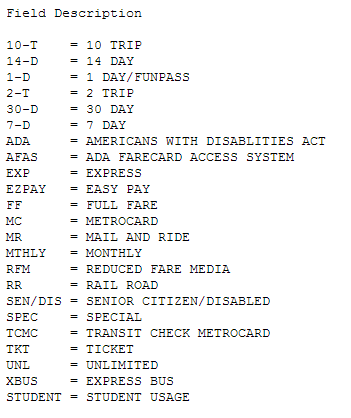

In [1]:
from __future__ import print_function, division
import pylab as pl
import numpy as np
import pandas as pd

from sklearn.ensemble  import RandomForestClassifier as rfc
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm

%pylab inline

from IPython.display import Image
from IPython.display import clear_output
pl.rcParams['font.size'] = 20
Image(filename = "Ridetypes.png")

This is the information I recieved about the data: "each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/19/2010 to 02/19/2014. "

The data are available to you as a python data cube here:

you can load it as

np.load(“MTA_Fare.npy") and

you will end up with a python numpy array of shape (600,23,194)

note that the missing values are inputted as -1

if you want to do things like algebra (summing time series for example) you need to take care of that! if you replace the -1 entries with NaN remember to use functions that can deal with nans: np.nanmean np.nansum...

In [2]:
mta = np.load('MTA_Fare_py3.npy')

mta.shape

(600, 23, 194)

In [3]:
mta = mta.astype(float)
mta[mta==-1] = np.nan
mta_agg = np.nansum(mta,axis=1)
mta_agg.shape

(600, 194)

In [4]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
print("number of ride types", len(ridetype))

number of ride types 23


In [5]:
dates = pd.date_range(start= '05/19/2010',periods=194, freq='W-Mon')

In [6]:
len(dates)

194

Text(0,0.5,'swipes(log10)')

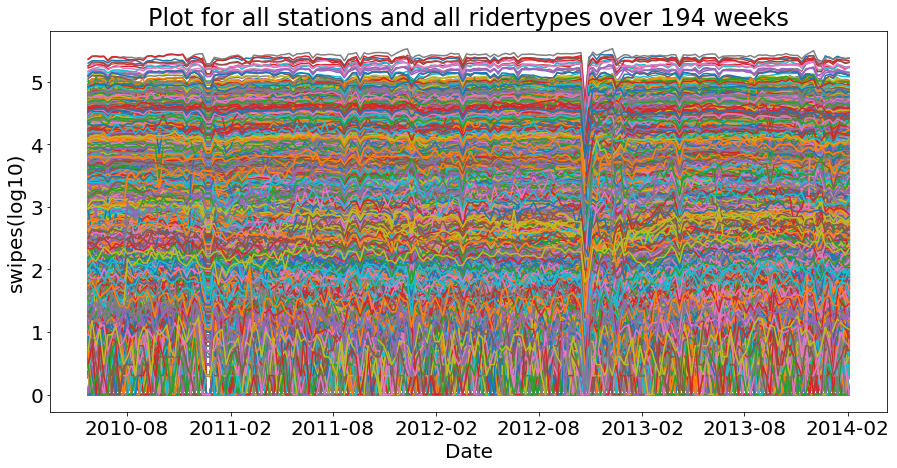

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
for x in range(mta.shape[0]):
    for y in range(mta.shape[1]):
        plt.plot(dates,np.log10(mta[x,y,:]))
plt.title('Plot for all stations and all ridertypes over 194 weeks')
plt.xlabel('Date')
plt.ylabel('swipes(log10)')

Figure 1: Plot showing the log10 of all the number of rides taken at each of the 600 stations for all ride types.

In [8]:
total = np.sum(mta_agg, axis=0)

In [9]:
total.shape

(194,)

In [10]:
mean = np.mean(total)
std = np.std(total)
print(mean, std)

29781349.8711 2983960.4217


In [11]:
threshold = [mean + 3 * std, mean - 3 * std]
threshold

[38733231.136236683, 20829468.606031362]

Text(0.5,1,'total rides for each week for 194 weeks')

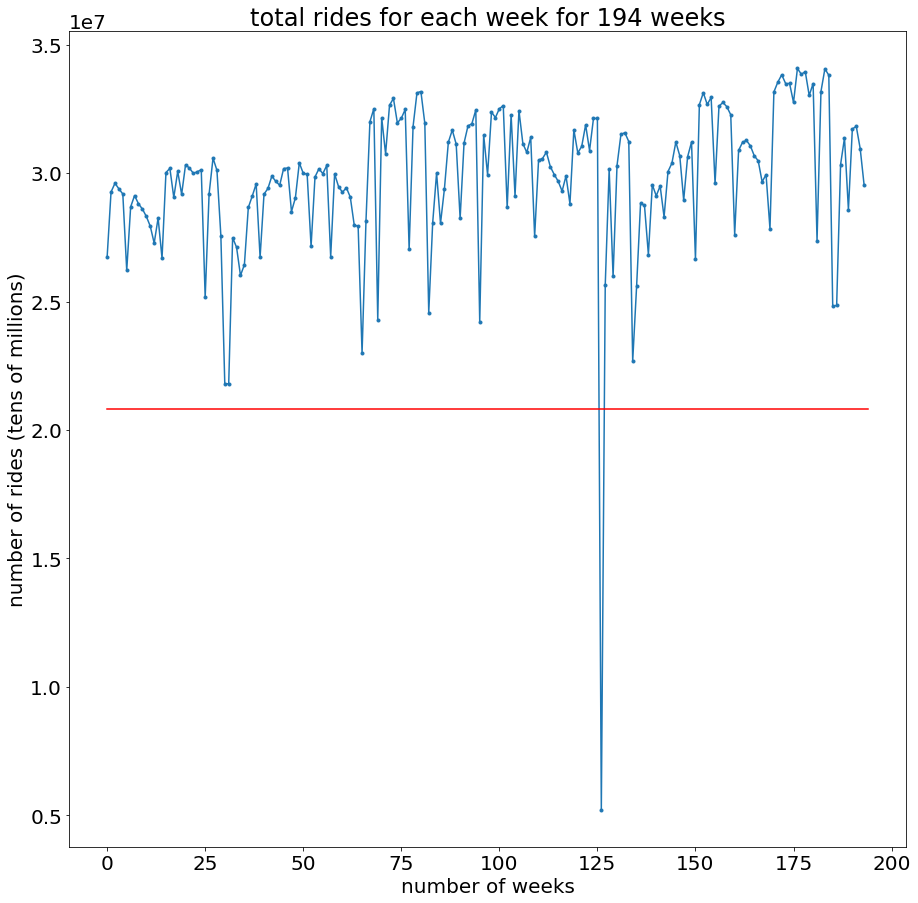

In [30]:
ax = pl.figure(figsize=(15,15))
pl.plot(total,'.-')
pl.plot((0,194),(threshold[1], threshold[1]), 'r-')
pl.xlabel('number of weeks')
pl.ylabel('number of rides (tens of millions)')
pl.title('total rides for each week for 194 weeks')

Subway ridership was significantly down in week 126. After doing some research on google, it seems like this was because of the Sandy hurricane that hit New York, and the subway was evidently not functioning at its optimum level.